# UAS indices script

## Florian Beyer
### 2020-07-06

#### sources:

- multispectral and rgb indices: https://www.indexdatabase.de/
- rgb indices: 
    - https://agribotix.com/wp-content/uploads/2017/05/Agribotix-VARI-TGI-Study.pdf
    - https://www.sciencedirect.com/science/article/pii/S0303243412001791
    - https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/14-0005.1
    

- texture indices: https://github.com/1044197988/Python-Image-feature-extraction/blob/master/%E7%BA%B9%E7%90%86%E7%89%B9%E5%BE%81/GLCM/fast_glcm.py


abbreviations:
- MS = multispectral
- RGB = true color sensor
- TEX = texture
- REL = relief


In [1]:
# packages

import numpy as np
import matplotlib.pyplot as plt
import cv2
import rasterio
import rasterio.plot
import pyproj
import pandas as pd
import seaborn as sns
from astropy.visualization import make_lupton_rgb
import os

In [4]:
## Inage
DS = 'R:/OwnCloud/DissBeyer/Trip/multistack/paw_14bands_stack.tif'

## Output directory
suffix_MS = '2018_11_01_H_MS_25cm_'
suffix_RGB = '2018_11_01_H_RGB_25cm_'
suffix_TEX = '2018_11_01_H_Texture_25cm_'
save_path = 'R:/OwnCloud/DissBeyer/Trip/indizes_advanced/'

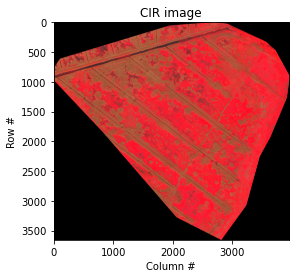

In [5]:
# read MS dataset
with rasterio.open(DS) as src:
    g2 = src.read(4) # green
    g2 = g2.astype('float')
    g2[g2 == 0] = np.nan
    r2 = src.read(5) # red
    r2 = r2.astype('float')
    r2[r2 == 0] = np.nan
    re = src.read(6) # red edge
    re = re.astype('float')
    re[re == 0] = np.nan
    nir = src.read(7) # near infrared
    nir = nir.astype('float')
    nir[nir == 0] = np.nan
    
# plot CIR image
MS_plot = make_lupton_rgb(nir, r2, g2, stretch=0.1)
plt.imshow(MS_plot)
plt.title('CIR image')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()    
    


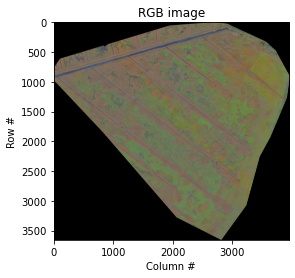

In [6]:
## read bands of RGB dataset
with rasterio.open(DS) as src:
    b = src.read(3) # red edge
    b = b.astype('float')
    b[b == 0] = np.nan
    g = src.read(2) # green
    g = g.astype('float')
    g[g == 0] = np.nan
    r = src.read(1) # red
    r = r.astype('float')
    r[r == 0] = np.nan
    
# plot RGB image
RGB_plot = make_lupton_rgb(r, g, b, stretch=100)
plt.imshow(RGB_plot)
plt.title('RGB image')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()



In [7]:
# Calculate MS indices
ndvi = (nir - r2) / (nir + r2)


atsavi = 1.22 * ((nir-1.22*r2-0.03) / (1.22*nir+re-1.22*0.03+0.08*(1+1.22**2)))
ari = (1/g2) - (1/r2)
avi = 2.0*nir-r2
arvi2 = -0.18+1.17*( (nir-r2) / (nir+r2) )
bri = ((1.0/g2) - (1.0/re)) / (nir)
# CARI ist nicht klar definiert
#temp_a = (re-g2)/150.0
#temp_b = (g2 - (((re-g2)/150.0 )*550.0))
#cari =  (re/r2) * ( (np.sqrt( ( a * 670.0 + r2 + b )**2 ) ) / (np.sqrt(a**2 + 1)) )
#cari2 = (re/r2) * ( np.absolute((a*r2+r2)) / (np.sqrt(a**2 + 1)) ) 
ccci = ( (nir-re)/(nir+re) ) / ( (nir-r2)/(nir+r2) )
chlgreen = (nir/g2)**(-1)
chlrededge = (nir/re)**(-1)
cigreen = (nir/g2)-1.0
cirededge = (nir/re)-1.0
ctvi = ((ndvi+0.5)/(np.absolute(ndvi+0.5)))+np.sqrt(np.absolute(ndvi+0.5))
cvi = nir*(r2/g2**2)
datt1 = (nir-re)/(nir-r2)
datt4 = r2/(g2*re)
ddn = 2*(re-nir-nir)
diff1 = nir-g2
diff2 = nir-r2
dvimss = 2.4*nir-r2
evi2 = 2.4*( (nir-r2) / (nir+r2+1.0) )
evi22 = 2.5*( (nir-r2) / (nir+2.4*r2+1.0) )
fe3 = r2/g2

n_temp = ( 2*(nir**2 - r2**2) + 1.5*nir+0.5*r2 ) / (nir+r2+0.5)
gemi = (n_temp*(1-0.25*n_temp) - ( (r2-0.125) / (1-r2) ))
gndvi = (nir-g2) / (nir+g2)
gosavi = ((nir-g2)/(nir+g2+0.5))*(1+0.5)
grndvi = (nir-(g2+r2)) / (nir+(g2+r2))
lai = 3.618*evi22-0.118 #https://www.harrisgeospatial.com/docs/BroadbandGreenness.html
lci = (nir-re)/(nir-r2)
logr = np.log(nir/r2)
maccioni = (nir-re)/(nir-r2)
mari = (g2**(-1) - re**(-1))*nir
mcari = ((re-r2) - 0.2*(re-g2))*(re/r2)
mcari1 = 1.2* (2.5*(nir-r2) - 1.3*(nir-g2))
mcari2 = 1.5 * ( ( 1.2*(nir-g2) - 2.5*(r2-g2) )/( np.sqrt( (2*nir+1)**2 - (6*nir-5*np.sqrt(r2)) -0.5)))
msavi = (2*nir+1-np.sqrt( (2*nir+1)**2 - 8*(nir-r2))) / 2
msr670 = ((nir/r2)-1) / (np.sqrt(((nir/r2)-1)))
mtvi2 = 1.5 * ( ( 2.5*(nir-g2) - 1.3*(r2-g2) )/( np.sqrt( (2*nir+1)**2 - (6*nir-5*np.sqrt(r2)) -0.5)))

mgvi = -0.386*g2-0.530*r2+0.535*re+0.532*nir
mnsi = 0.404*g2-0.039*r2-0.505*re+0.762*nir
msbi = 0.406*g2+0.600*r2+0.645*re+0.243*nir
myvi = 0.723*g2-0.597*r2+0.206*re-0.278*nir

ndre = (nir-re) / (nir+re)
ndrdi = (g2-re) / (g2+re)
nli = (nir**2 - r2) / (nir**2 + r2)
normg = g2/(nir+r2+g2)
normnir = nir/(nir+r2+g2)
normr = r2/(nir+r2+g2)

osavi1 = (1 + 0.16) * (nir - r2)/(nir + r2 + 0.16)
osavi2 = (1 + 0.16) * (nir - re)/(nir + re + 0.16)
pvr = (g2-r2) / (g2+r2)
rdvi = (nir-r2) / (nir+r2)**0.5
rededge2 = rdvi = (nir-re) / (nir+re)
# L = 0.5 muss nachrecherchiert werden (huete 1989)
savi = ((nir-r2) / (nir+r2+0.5))*(1+0.5)
sbl = nir- 2.4*r2
spvi = 0.4*( 3.7*(nir-r2) - 1.2*np.absolute(g2-r2) )

tcari = 3*( (re-r2) -0.2*(re-g2) *(re/r2))
tcari2 = 3*( (nir-re) -0.2*(nir-g2) *(nir/re))
tcari_osavi = tcari/osavi1
tci = 1.2*(re-g2) -1.5*(r2-g2)+np.sqrt(re/r2)
tvi = np.sqrt(((nir-r2) / (nir+r2))+0.5)

tc_gvimss = -0.283*g2-0.660*r2+0.577*re+0.388*nir
tc_nsimss = -0.016*g2+0.131*r2-0.425*re+0.882*nir
tc_sbimss =  0.332*g2+0.603*r2+0.675*re+0.262*nir
tc_yvimss = -0.899*g2+0.428*r2+0.076*re-0.041*nir

varirededge = (re-r2) / (re+r2)

wdrvi = (0.1*nir-r2)/(0.1*nir+r2)


mcari_mtvi2 = mcari/mtvi2

mcari_osavi = mcari/osavi2

print('calculation done')


calculation done


In [8]:
indices_MS = [ndvi,atsavi,ari,avi,arvi2,bri,ccci,chlgreen,chlrededge,cigreen,cirededge,ctvi,cvi,datt1,datt4,ddn,
           diff1,diff2,dvimss,evi2,evi22,fe3,gemi,gndvi,gosavi,grndvi,lai,lci,logr,maccioni,mari,mcari,mcari1,mcari2,
           msavi,msr670,mtvi2,mgvi,mnsi,msbi,myvi,ndre,ndrdi,nli,normg,normnir,normr,osavi1,osavi2,pvr,rdvi,rededge2,
           savi,sbl,spvi,tcari,tcari2,tcari_osavi,tci,tvi,tc_gvimss,tc_nsimss,tc_sbimss,tc_yvimss,varirededge,wdrvi,
           mcari_mtvi2,mcari_osavi]
indices_names_MS = ['ndvi','atsavi','ari','avi','arvi2','bri','ccci','chlgreen','chlrededge','cigreen','cirededge',
                 'ctvi','cvi','datt1','datt4','ddn','diff1','diff2','dvimss','evi2','evi22','fe3','gemi','gndvi',
                 'gosavi','grndvi','lai','lci','logr','maccioni','mari','mcari','mcari1','mcari2','msavi','msr670','mtvi2',
                 'mgvi','mnsi','msbi','myvi','ndre','ndrdi','nli','normg','normnir','normr','osavi1','osavi2','pvr',
                 'rdvi','rededge2','savi','sbl','spvi','tcari','tcari2','tcari_osavi','tci','tvi','tc_gvimss','tc_nsimss',
                 'tc_sbimss','tc_yvimss','varirededge','wdrvi','mcari_mtvi2','mcari_osavi']

In [9]:
# Calculate RGB indices

# https://agribotix.com/wp-content/uploads/2017/05/Agribotix-VARI-TGI-Study.pdf
vari = (g-r)/(g+r-b)
tgi = g-0.39*r-0.61*b

# https://www.sciencedirect.com/science/article/pii/S0303243412001791
ngrdi = (g-r)/(g+r)
gli = (2*g-r-b)/(2*g+r+b)


# https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/14-0005.1
gcc = g/(r+g+b)
exg = 2+g-(r+b)

In [10]:
indices_RGB = [vari,tgi,ngrdi,gli,gcc,exg]
indices_names_RGB = ['vari','tgi','ngrdi','gli','gcc','exg']

In [11]:
# calculate texture indices

def main():
    pass


def fast_glcm(img, vmin=0, vmax=255, nbit=8, kernel_size=5):
    mi, ma = vmin, vmax
    ks = kernel_size
    h,w = img.shape

    # digitize
    bins = np.linspace(mi, ma+1, nbit+1)
    gl1 = np.digitize(img, bins) - 1
    gl2 = np.append(gl1[:,1:], gl1[:,-1:], axis=1)

    # make glcm
    glcm = np.zeros((nbit, nbit, h, w), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            mask = ((gl1==i) & (gl2==j))
            glcm[i,j, mask] = 1

    kernel = np.ones((ks, ks), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            glcm[i,j] = cv2.filter2D(glcm[i,j], -1, kernel)

    glcm = glcm.astype(np.float64)
    return glcm


def fast_glcm_mean(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm mean
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float64)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    return mean


def fast_glcm_std(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm std
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float64)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    std2 = np.zeros((h,w), dtype=np.float64)
    for i in range(nbit):
        for j in range(nbit):
            std2 += (glcm[i,j] * i - mean)**2

    std = np.sqrt(std2)
    return std


def fast_glcm_contrast(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm contrast
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    cont = np.zeros((h,w), dtype=np.float64)
    for i in range(nbit):
        for j in range(nbit):
            cont += glcm[i,j] * (i-j)**2

    return cont


def fast_glcm_dissimilarity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm dissimilarity
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    diss = np.zeros((h,w), dtype=np.float64)
    for i in range(nbit):
        for j in range(nbit):
            diss += glcm[i,j] * np.abs(i-j)

    return diss


def fast_glcm_homogeneity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm homogeneity
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    homo = np.zeros((h,w), dtype=np.float64)
    for i in range(nbit):
        for j in range(nbit):
            homo += glcm[i,j] / (1.+(i-j)**2)

    return homo


def fast_glcm_ASM(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm asm, energy
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    asm = np.zeros((h,w), dtype=np.float64)
    for i in range(nbit):
        for j in range(nbit):
            asm  += glcm[i,j]**2

    ene = np.sqrt(asm)
    return asm, ene


def fast_glcm_max(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm max
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    max_  = np.max(glcm, axis=(0,1))
    return max_


def fast_glcm_entropy(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm entropy
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    pnorm = glcm / np.sum(glcm, axis=(0,1)) + 1./ks**2
    ent  = np.sum(-pnorm * np.log(pnorm), axis=(0,1))
    return ent


r_uint = r.astype('uint')
g_unit = g.astype('uint')
b_unit = b.astype('uint')

# weighted PAN
# https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm
# https://journalofbabylon.com/index.php/JUBPAS/article/view/1677/1332
pan2 = ( (0.3 * r) + (0.59 * g) + (0.11 * b) )
pan2 = pan2.astype('uint')

if __name__ == '__main__':
    main()

    img = pan2
    
    nbit = 8 #?
    ks = 11 #kernel size
    mi, ma = 0, 255 # min and max

    mean = fast_glcm_mean(img, mi, ma, nbit, ks)
    std = fast_glcm_std(img, mi, ma, nbit, ks)
    cont = fast_glcm_contrast(img, mi, ma, nbit, ks)
    diss = fast_glcm_dissimilarity(img, mi, ma, nbit, ks)
    homo = fast_glcm_homogeneity(img, mi, ma, nbit, ks)
    asm, ene = fast_glcm_ASM(img, mi, ma, nbit, ks)
    ma = fast_glcm_max(img, mi, ma, nbit, ks)
    ent = fast_glcm_entropy(img)
print('calculation done')

calculation done


In [12]:
indices_TEX = [mean,std,cont,diss,homo,asm, ene,ma,ent]
indices_names_TEX = ['mean','std','cont','diss','homo','asm', 'ene','ma','ent']

In [13]:
# update crs
with rasterio.open(DS) as src:
    print('Meta data of the image dataset: {} \n\n'.format(src.profile))
    profile = src.profile.copy()
    
    profile.update({
        # all meta data are the same except the bands number
        'count': 1,# this is the important update from 4 bands to one band
        'dtype': 'float64'
        })
    print('Meta data of the index dataset: {}'.format(profile))


Meta data of the image dataset: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 3952, 'height': 3656, 'count': 14, 'crs': CRS.from_epsg(32633), 'transform': Affine(0.25, 0.0, 315681.129,
       0.0, -0.25, 6011227.187), 'tiled': False, 'interleave': 'pixel'} 


Meta data of the index dataset: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 3952, 'height': 3656, 'count': 1, 'crs': CRS.from_epsg(32633), 'transform': Affine(0.25, 0.0, 315681.129,
       0.0, -0.25, 6011227.187), 'tiled': False, 'interleave': 'pixel'}


In [14]:
# save all indices

# save MS indices
for i in range(len(indices_MS)):
    filename = save_path+suffix_MS+indices_names_MS[i]+'.tif'
    with rasterio.open(filename, 'w', **profile) as dst:
        dst.write_band(1,indices_MS[i])
    print('{} saved to disk.'.format(indices_names_MS[i]))    
print('All MS indices saved to - {} - with suffix - {} -'.format(save_path,suffix_MS))

ndvi saved to disk.
atsavi saved to disk.
ari saved to disk.
avi saved to disk.
arvi2 saved to disk.
bri saved to disk.
ccci saved to disk.
chlgreen saved to disk.
chlrededge saved to disk.
cigreen saved to disk.
cirededge saved to disk.
ctvi saved to disk.
cvi saved to disk.
datt1 saved to disk.
datt4 saved to disk.
ddn saved to disk.
diff1 saved to disk.
diff2 saved to disk.
dvimss saved to disk.
evi2 saved to disk.
evi22 saved to disk.
fe3 saved to disk.
gemi saved to disk.
gndvi saved to disk.
gosavi saved to disk.
grndvi saved to disk.
lai saved to disk.
lci saved to disk.
logr saved to disk.
maccioni saved to disk.
mari saved to disk.
mcari saved to disk.
mcari1 saved to disk.
mcari2 saved to disk.
msavi saved to disk.
msr670 saved to disk.
mtvi2 saved to disk.
mgvi saved to disk.
mnsi saved to disk.
msbi saved to disk.
myvi saved to disk.
ndre saved to disk.
ndrdi saved to disk.
nli saved to disk.
normg saved to disk.
normnir saved to disk.
normr saved to disk.
osavi1 saved to d

In [15]:
# save RGB indices
for i in range(len(indices_RGB)):
    filename = save_path+suffix_RGB+indices_names_RGB[i]+'.tif'
    with rasterio.open(filename, 'w', **profile) as dst:
        dst.write_band(1,indices_RGB[i])
    print('{} saved to disk.'.format(indices_names_RGB[i]))    
print('All MS indices saved to - {} - with suffix - {} -'.format(save_path,suffix_RGB))

vari saved to disk.
tgi saved to disk.
ngrdi saved to disk.
gli saved to disk.
gcc saved to disk.
exg saved to disk.
All MS indices saved to - R:/OwnCloud/DissBeyer/Trip/indizes_advanced/ - with suffix - 2018_11_01_H_RGB_25cm_ -


In [16]:
# save Texture indices
for i in range(len(indices_TEX)):
    filename = save_path+suffix_TEX+indices_names_TEX[i]+'.tif'
    with rasterio.open(filename, 'w', **profile) as dst:
        dst.write_band(1,indices_TEX[i])
    print('{} saved to disk.'.format(indices_names_TEX[i]))    
print('All MS indices saved to - {} - with suffix - {} -'.format(save_path,suffix_TEX))

mean saved to disk.
std saved to disk.
cont saved to disk.
diss saved to disk.
homo saved to disk.
asm saved to disk.
ene saved to disk.
ma saved to disk.
ent saved to disk.
All MS indices saved to - R:/OwnCloud/DissBeyer/Trip/indizes_advanced/ - with suffix - 2018_11_01_H_Texture_25cm_ -


### Correlation between indices and clustering

In [46]:
# load relief indicies
REL_index_path = 'R:/OwnCloud/DissBeyer/Trip/indizes_advanced/dsm_indices/subset_V2/'

files = []
for file in os.listdir(REL_index_path):
    if file.endswith(".tif"):
        files.append(file)

print('number of images: {} \n first image name: {}'.format(len(files), files[0]))

number of images: 6 
 first image name: aspect.tif


In [47]:
# read MS dataset

indices_REL = []
indices_names_REL = []

for i in files:
    name = i[:-4]
    with rasterio.open(REL_index_path+i) as src:
        temp = src.read(1)
        temp = temp.astype('float64')
        temp[temp == -9999] = np.nan
    indices_REL.append(temp)
    indices_names_REL.append(name)


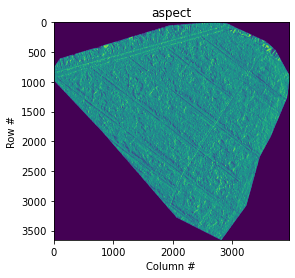

In [48]:
# plot CIR image
plt.imshow(indices_REL[0])
plt.title(indices_names_REL[0])
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()    
    

In [49]:
# adding all indicies in one pandas dataframe

indices_all = indices_MS + indices_RGB + indices_TEX + indices_REL
indices_names_all = indices_names_MS + indices_names_RGB + indices_names_TEX + indices_names_REL

In [56]:
# preparing data for correlation
indices_corr = []
for i in indices_all:
    indices_corr.append(i.reshape(i.shape[0]*i.shape[1]),)

index_list = pd.DataFrame(np.row_stack(indices_corr)).T
index_list.columns = indices_names_all

# correlation matrix
corr = index_list.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))



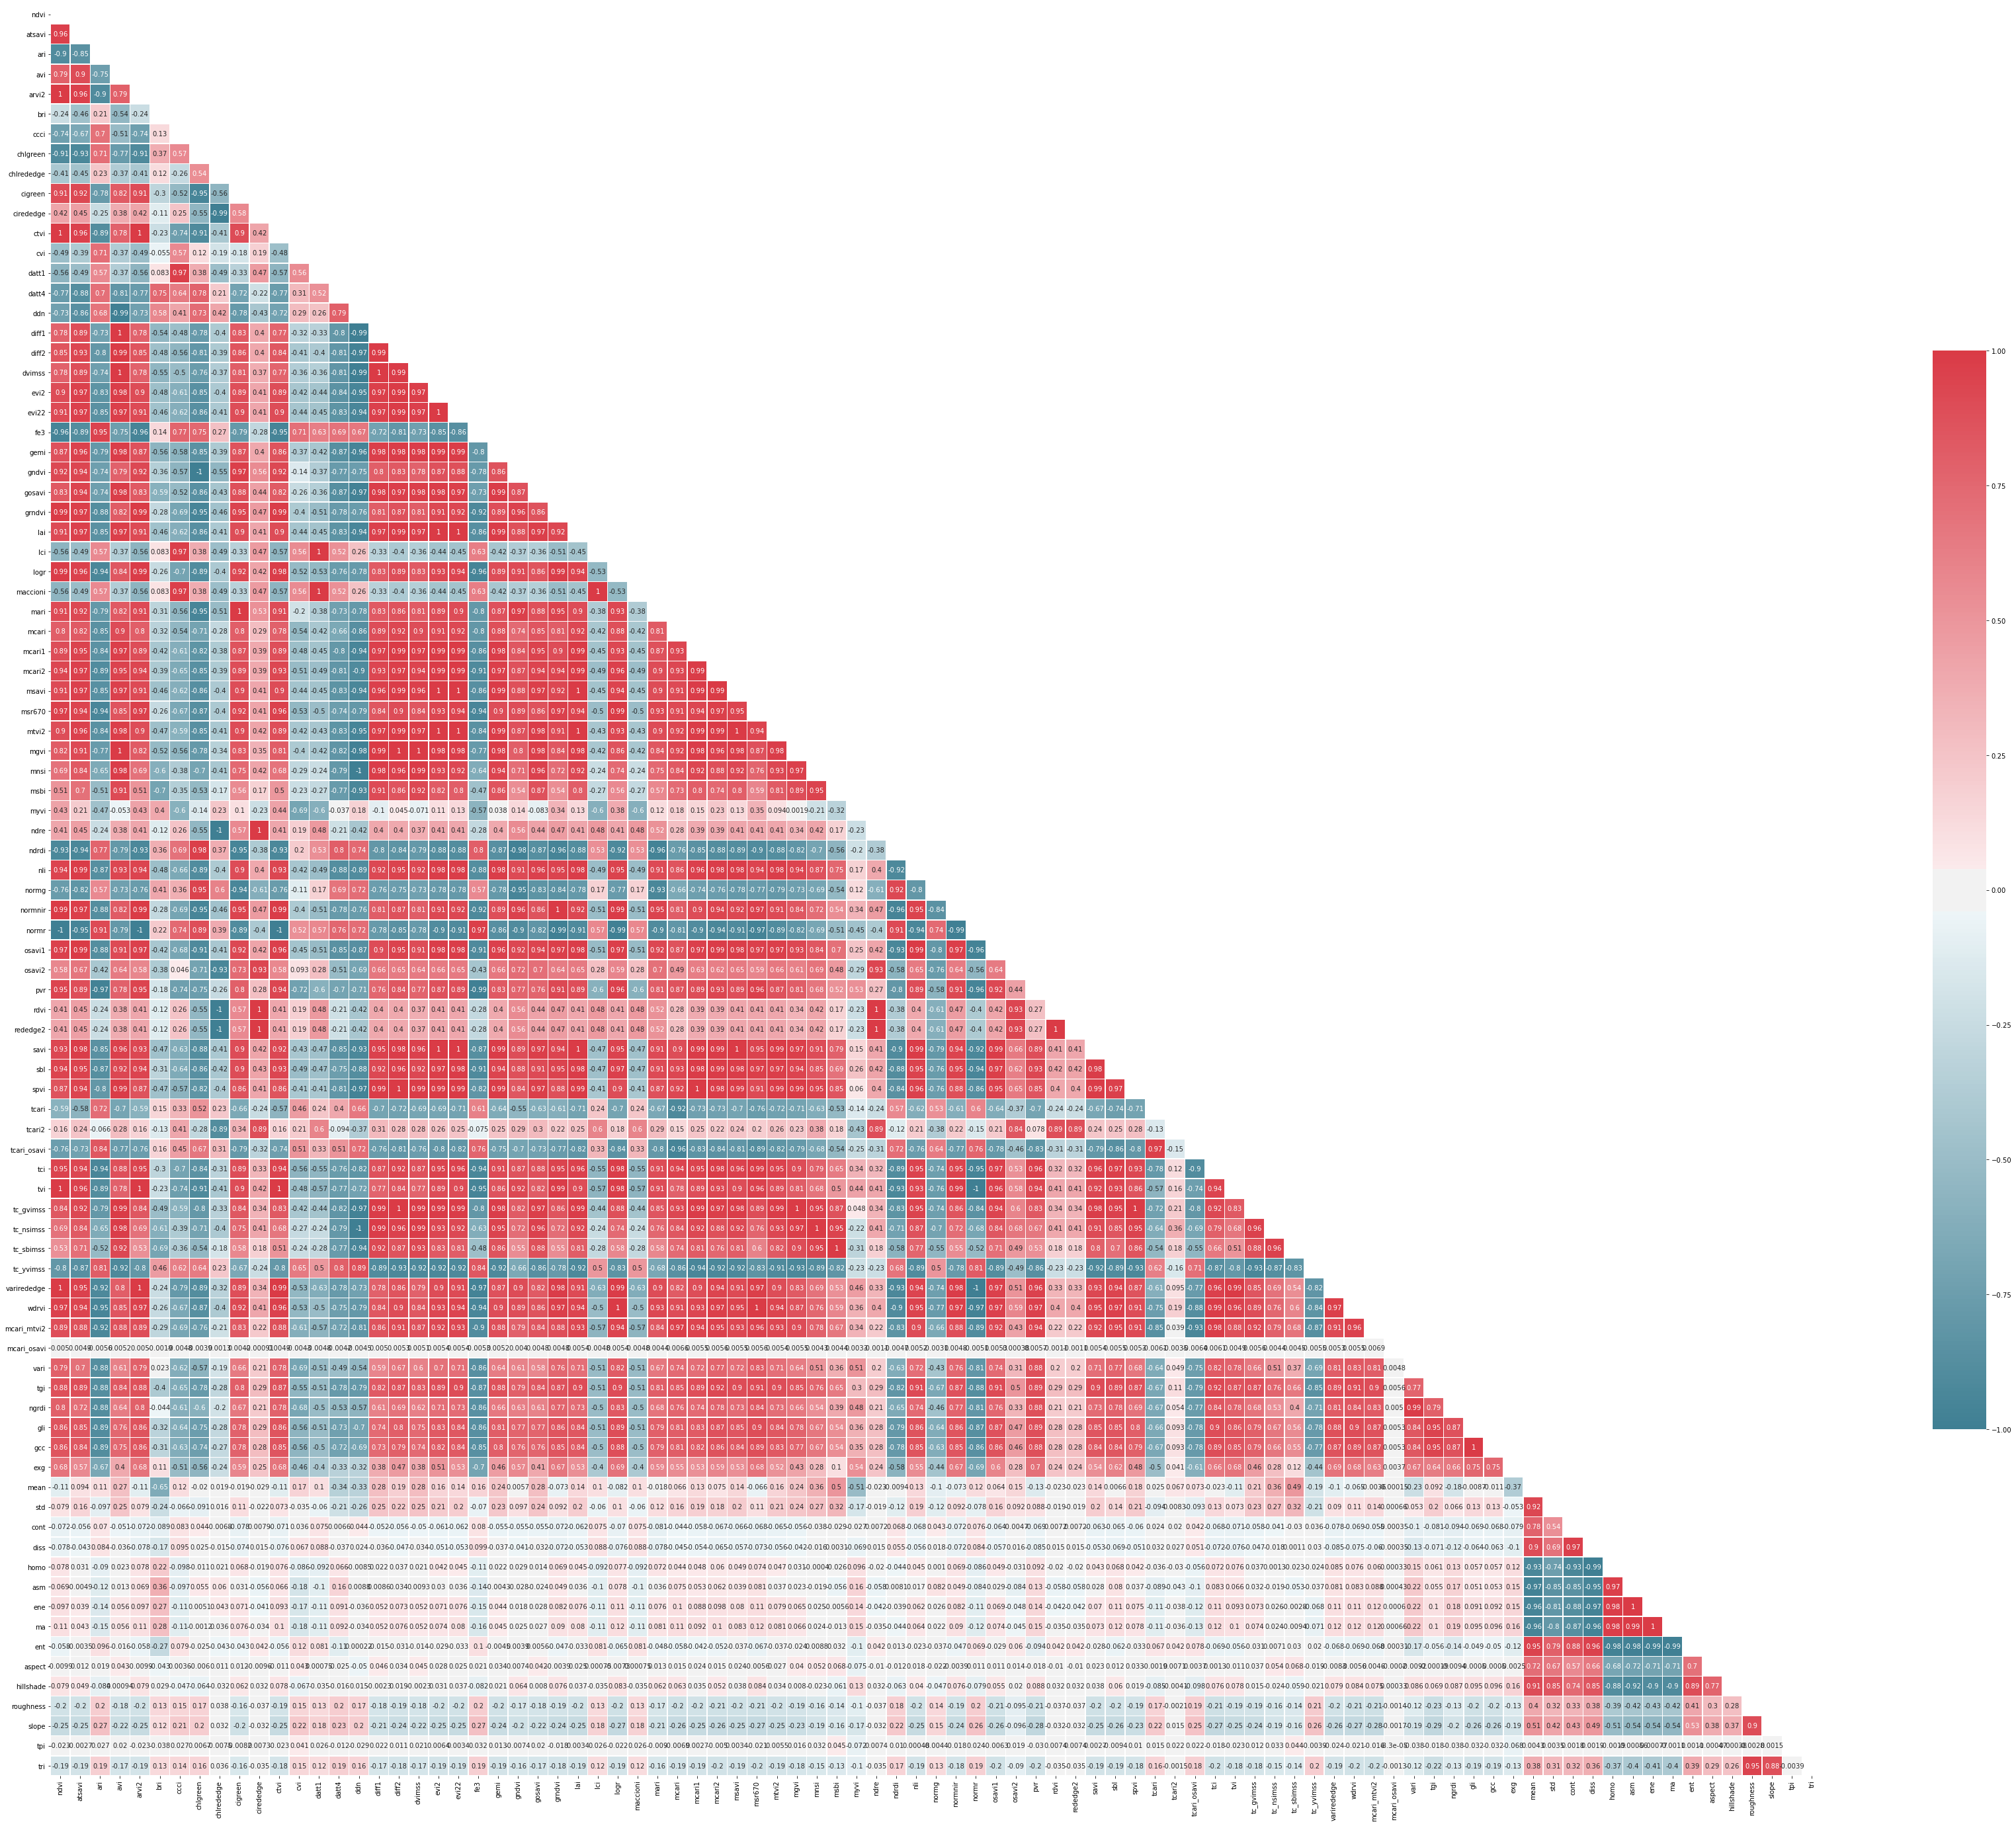

In [62]:
# plot correlation matrix
f, ax = plt.subplots(figsize=(60, 60))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, vmin = -1, vmax=1, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('R:/OwnCloud/DissBeyer/Diss2020/Arbeit/Abbildungen/05_Ergebnisse/PaW_CorrMatrix.pdf')
plt.show()

In [58]:
corr

ndvi    atsavi       ari       avi     arvi2       bri  \
ndvi       1.000000  0.961288 -0.900496  0.794748  1.000000 -0.236168   
atsavi     0.961288  1.000000 -0.847241  0.900054  0.961288 -0.460974   
ari       -0.900496 -0.847241  1.000000 -0.748014 -0.900496  0.206156   
avi        0.794748  0.900054 -0.748014  1.000000  0.794748 -0.539336   
arvi2      1.000000  0.961288 -0.900496  0.794748  1.000000 -0.236168   
...             ...       ...       ...       ...       ...       ...   
hillshade  0.078937  0.048843 -0.083656  0.000936  0.078937  0.029468   
roughness -0.195986 -0.200842  0.201385 -0.183258 -0.195986  0.133806   
slope     -0.254855 -0.246590  0.272114 -0.220278 -0.254855  0.115167   
tpi       -0.022624 -0.002721  0.027400  0.019921 -0.022624 -0.038059   
tri       -0.186690 -0.190913  0.192265 -0.173824 -0.186690  0.126034   

               ccci  chlgreen  chlrededge   cigreen  ...       asm       ene  \
ndvi      -0.737133 -0.909304   -0.406576  0.905947  ...  0.069251  0.096966   
atsavi    -0.670894 -0.928477   -0.445575  0.916227  ... -0.004891  0.039318   
ari        0.696581  0.713942    0.234383 -0.777827  ... -0.123988 -0.142168   
avi       -0.512856 -0.769604   -0.371570  0.816056  ...  0.012999  0.055501   
arvi2     -0.737133 -0.909304   -0.406576  0.905947  ...  0.069251  0.096966   
...             ...       ...         ...       ...  ...       ...       ...   
hillshade -0.046677 -0.064340   -0.031708  0.061841  ... -0.917333 -0.903775   
roughness  0.149752  0.170937    0.037585 -0.163178  ... -0.422289 -0.425707   
slope      0.206995  0.201910    0.031671 -0.204482  ... -0.538987 -0.543815   
tpi        0.026789  0.006675   -0.007511 -0.008218  ... -0.000556 -0.000772   
tri        0.142882  0.162364    0.035663 -0.155263  ... -0.402966 -0.406155   

                 ma       ent    aspect  hillshade  roughness     slope  \
ndvi       0.105056 -0.058471 -0.009934   0.078937  -0.195986 -0.254855   
atsavi     0.043409 -0.003469  0.012097   0.048843  -0.200842 -0.246590   
ari       -0.147804  0.095625  0.018970  -0.083656   0.201385  0.272114   
avi        0.055928 -0.016136  0.043044   0.000936  -0.183258 -0.220278   
arvi2      0.105056 -0.058471 -0.009934   0.078937  -0.195986 -0.254855   
...             ...       ...       ...        ...        ...       ...   
hillshade -0.901226  0.893612  0.770488   1.000000   0.275220  0.372571   
roughness -0.422618  0.411348  0.300698   0.275220   1.000000  0.895671   
slope     -0.540776  0.527590  0.378177   0.372571   0.895671  1.000000   
tpi       -0.001059  0.001102 -0.000473  -0.000381  -0.002782  0.001504   
tri       -0.403229  0.392638  0.287487   0.256208   0.950288  0.882758   

                tpi       tri  
ndvi      -0.022624 -0.186690  
atsavi    -0.002721 -0.190913  
ari        0.027400  0.192265  
avi        0.019921 -0.173824  
arvi2     -0.022624 -0.186690  
...             ...       ...  
hillshade -0.000381  0.256208  
roughness -0.002782  0.950288  
slope      0.001504  0.882758  
tpi        1.000000 -0.003862  
tri       -0.003862  1.000000  

[89 rows x 89 columns]

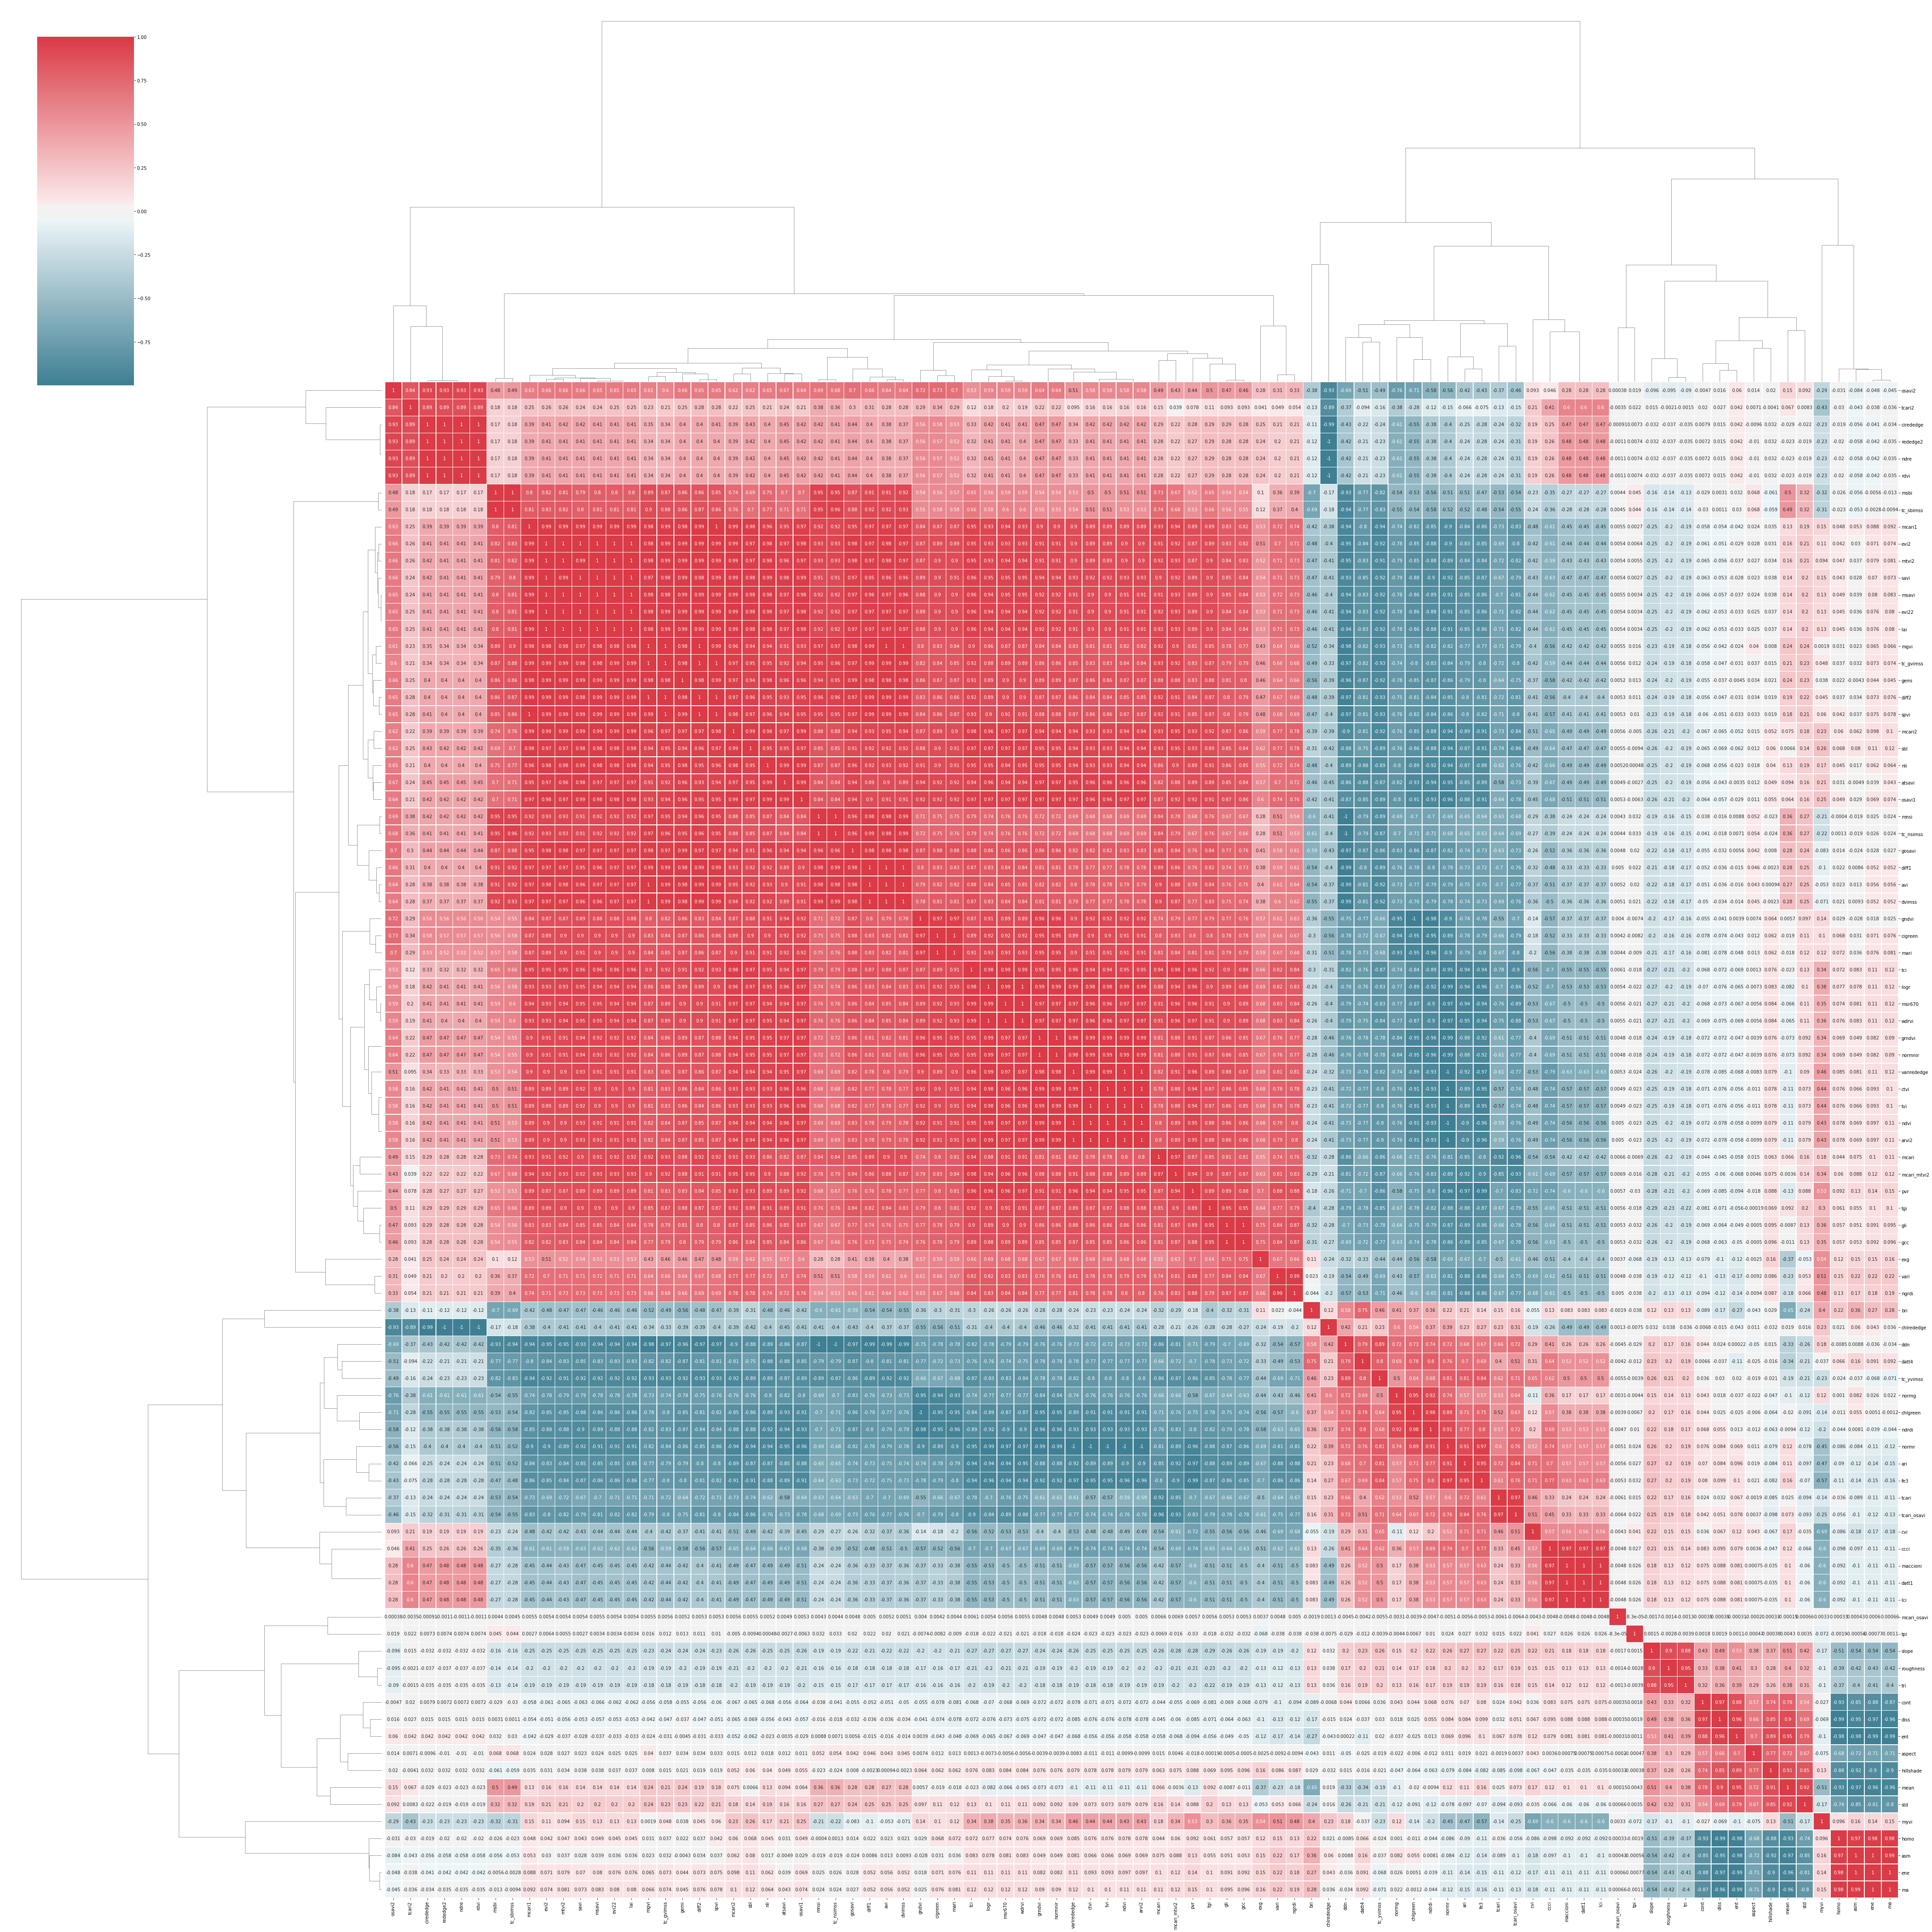

In [61]:
# clustering matrix

sns.clustermap(corr,annot=True, cmap=cmap, figsize=(60, 60),linewidths=.5)
plt.savefig('R:/OwnCloud/DissBeyer/Diss2020/Arbeit/Abbildungen/05_Ergebnisse/PaW_Cluster.pdf')
plt.show()